Задание
Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)

Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)


In [1]:
import numpy as np
numpy_array_1 = np.array([10, 10, 10])
numpy_array_2 = np.array([0, 0, -10])

numpy_array_1 + numpy_array_2

array([10, 10,  0])

Задание (в программе)
Напишите код на Python, реализующий построение графиков:
окружности,	
эллипса,
гиперболы.


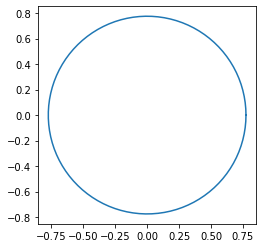

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# theta from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 100)

# radius of the circle
r = np.sqrt(0.6)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.set_aspect(1)
plt.show()

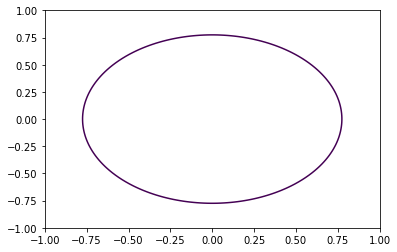

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 0.6
plt.contour(X,Y,F,[0])
plt.show()

C:\Users\mad_i\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


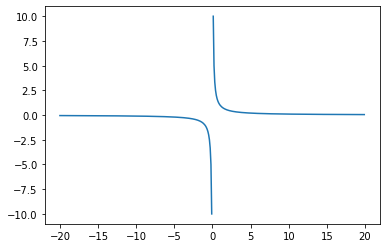

In [11]:
import matplotlib.pyplot as plt
import decimal
import numpy as np

xmin = -20
xmax = 20
dx = 0.1

xlist = np.around(np.arange(xmin, xmax, dx), decimals=4)

ylist = 1 / xlist

plt.plot(xlist, ylist)
plt.show()

Задание (в программе)
Нарисуйте трехмерный график двух параллельных плоскостей.



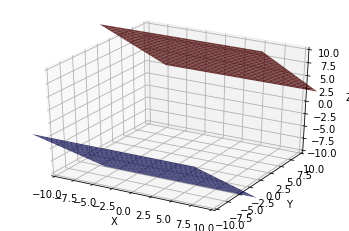

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import meshgrid,linspace,zeros,dot,norm,cross,vstack,array,matrix,sqrt



def rotmatrix(axis,costheta):
    """ Calculate rotation matrix

    Arguments:
    - `axis`     : Rotation axis
    - `costheta` : Rotation angle
    """
    x,y,z = axis
    c = costheta
    s = sqrt(1-c*c)
    C = 1-c
    return  matrix([[ x*x*C+c,    x*y*C-z*s,  x*z*C+y*s ],
                    [ y*x*C+z*s,  y*y*C+c,    y*z*C-x*s ],
                    [ z*x*C-y*s,  z*y*C+x*s,  z*z*C+c   ]])

def plane(Lx,Ly,Nx,Ny,n,d):
    """ Calculate points of a generic plane 

    Arguments:
    - `Lx` : Plane Length first direction
    - `Ly` : Plane Length second direction
    - `Nx` : Number of points, first direction
    - `Ny` : Number of points, second direction
    - `n`  : Plane orientation, normal vector
    - `d`  : distance from the origin
    """

    x = linspace(-Lx/2,Lx/2,Nx)
    y = linspace(-Ly/2,Ly/2,Ny)
    # Create the mesh grid, of a XY plane sitting on the orgin
    X,Y = meshgrid(x,y)
    Z   = zeros([Nx,Ny])
    n0 = array([0,0,1])

    # Rotate plane to the given normal vector
    if any(n0!=n):
        costheta = dot(n0,n)/(norm(n0)*norm(n))
        axis     = cross(n0,n)/norm(cross(n0,n))
        rotMatrix = rotmatrix(axis,costheta)
        XYZ = vstack([X.flatten(),Y.flatten(),Z.flatten()])
        X,Y,Z = array(rotMatrix*XYZ).reshape(3,Nx,Ny)

    dVec = (n/norm(n))*d
    X,Y,Z = X+dVec[0],Y+dVec[1],Z+dVec[2]
    return X,Y,Z


if __name__ == "__main__":

    # Plot as many planes as you like
    Nplanes = 2

    # Set color list from a cmap
    colorList = cm.jet(linspace(0,1,Nplanes))

    # List of Distances
    distList = linspace(-10,10,Nplanes)

    # Plane orientation - normal vector
    normalVector = array([0,1,1]) # Y direction

    # Create figure
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plotting
    for i,ypos in enumerate(linspace(-10,10,2)):

        # Calculate plane
        X,Y,Z = plane(20,20,100,100,normalVector,distList[i])

        ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                        alpha=0.8, color=colorList[i])

    # Set plot display parameters    
    ax.set_xlabel('X')
    ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    ax.set_zlim(-10, 10)

    plt.show()

Нарисуйте трехмерный график двух любых поверхностей второго порядка.

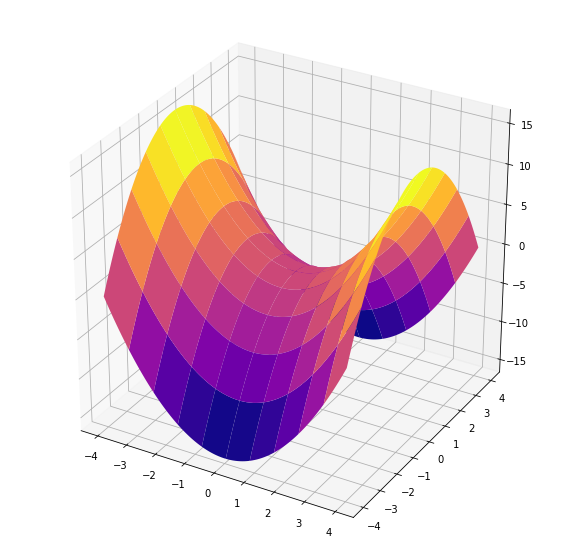

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
# уравнение поверхности
f = lambda x, y: x ** 2 - y ** 2
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 100)
yval = np.linspace(-4, 4, 100)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = f(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 10,
cstride = 10,
# цветовая схема plasma
cmap = cm.plasma)